# Big Data - Final Assignment

This assignment was written with love and passion *(and a huge ~lach~ lack of sleep)* by Benjamin Amar 🦊

Delivered for the Big Data elective class Final Assignment in February 2022.

![](fox.png)

In [1]:
#Importing all libraries
import pandas as pd
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## Part 1. Exercises

#### 1. For a fraud detection task: Define FP and FN, which mistake costs more?

**FP** represents **F**alse **P**ositives, meaning that there is no fraud but thinking there is one.
<br>**FN** represents **F**alse **N**egatives, meaning that there is a fraud but thinking there is none.

This is why in the context of a fraud detection task, a False Negative would cost more to a company than a False Positive.

#### 2. Fraud detection model

```
Recall : TP / (TP + FN) = 0.5
Precision : TP / (TP + FP) = 0.8
Accuracy : (TP + TN) / (P + N) = 0.95
Population : TP + TN + FP + FN = 600
```

We have a 4 variables equation system that can be resolved.
First of all, we will isolate **TP**

**Recall :**
```
TP / (TP + FN) = 0.5
<=> TP = 0.5*TP + 0.5*FN
<=> 0.5*TP = 0.5*FN
<=> TP = FN
```

**Precision :**
```
TP / (TP + FP) = 0.8
<=> TP = 0.8*TP + 0.8*FP
<=> 0.2*TP = 0.8*FP
<=> FP = 0.25*TP
```

**Accuracy :**
```
(TP + TN) / (P + N) = 0.95
<=> TP + TN = 0.95*(P + N)  <---(P+N = 600)
<=> TP + TN = 0.95*600
```

**Population :**
```
TP + TN + FP + FN = 600
<=> 0.95*600 + 0.25*TP + TP = 600
<=> TP = (600*0.95+600) / 1.25
<=> TP = 24
```

Now that we have found the value of TP we can deduce the other values.

```
TP = 24   and   TP = FN   hence   TP = FN = 24
FP = 0.25*TP = 6
TN = 600 - 24 - 24 - 6 = 546
```

We can now build the model's confusion matrix

In [2]:
matrix = pd.DataFrame([[546,24],[6,24]])
matrix.loc["Total"] = matrix.sum(axis=0)
matrix["Total"] = matrix.sum(axis=1)
matrix.columns = pd.MultiIndex.from_tuples([("Real","-"),("Real","+"),("","Total")])
matrix.index = pd.MultiIndex.from_tuples([("Predicted","-"),("Predicted","+"),("","Total")])
matrix

Real          
                   -   + Total
Predicted -      546  24   570
          +        6  24    30
          Total  552  48   600

We can interpret that this fraud detection model is not very efficient at **finding all the frauds**, however it is efficient at **detecting real frauds**.

#### 3. Which of the following regressions has a higher risk of overfitting the data?

a. Linear regression using `y=a+b*x` : This model is more likely to be underfitting because it is too simple.
<br>In other words, it is important to avoid too simple models that won't be able to represent the phenomenon we are interested in and won't provide good predictions


b. Linear regression using `y=a+b*x+c*x2` : This model is the less likely to be overfitting since it is the best compromise for bias and variance


c. Linear regression using `y=a+b*x+c*x2+d*x3` : This model is more likely to be overfitting because it is too complex. 
<br>Such a model will get really good performances on training data but won't be efficient when facing new data.

![](Overfitting.jpg)

A simple model with low variance will be more likely to be underfitting, having a high bias even on the training data.
<br>A complex model with a high variance will be more likely to be overfitting, having a low bias on the training data but high on new data.

**The goal here is to find a intermediate model where the prediction bias is the lowest and the generalisation is the best.**

    What Overfitting would look like in real life...
![](Overfitting.png)

## Part 2. Insure-Best Dataset

Welcome on this analysis of the Insure-Best dataset where the objective is to train a model that calculates the **CLV** *(Customer's Lifetime Value)*, a value the company needs to score its customers.

The datasets consist of 2 datasets : 
<br>`CLV-Training.csv`, a training dataset containing 8637 customer accounts with their respective CLV
<br>`CLV-Test.csv`, a test dataset containing 646 new customer accounts with a CLV to calculate

We are first going to work on the Training dataset, watch an overview, clean it, tailor it and then analyse it.
<br>Next we will create multiple models and train them after tuning their hyperparameters.
<br>Finally we will compare our new results with the training data based on their distribution.

The AzureML experiment can be found at the link below:
<br>https://gallery.cortanaintelligence.com/Experiment/Big-Data-Final-Assignment-Benjamin-Amar

This analysis was performed and written by Benjamin Amar for the Big Data elective final assignment in January and February 2022.

🦊

# 1.0 Beginning of analysis

In [3]:
#Loading the dataset in memory
data = pd.read_csv("CLV-Training.csv")

#Displaying all columns of the dataset
pd.set_option('display.max_columns', None)
data.describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,CLV
count,8637.000000,8637.000000,8637.000000,8637.00000,8637.000000,8637.000000,8637.000000,8637.000000
mean,37670.275906,93.282853,15.152831,48.02744,0.381614,2.967466,434.529481,7999.903842
std,30379.553849,34.526547,10.071044,27.88397,0.907881,2.389180,290.536359,6848.774265
min,0.000000,61.000000,0.000000,0.00000,0.000000,1.000000,0.099007,1898.683686
25%,0.000000,68.000000,6.000000,24.00000,0.000000,1.000000,272.217171,3997.476302
50%,33816.000000,83.000000,14.000000,48.00000,0.000000,2.000000,383.797363,5797.604861
75%,62262.000000,109.000000,23.000000,71.00000,0.000000,4.000000,547.619785,8937.118615
max,99981.000000,298.000000,35.000000,99.00000,5.000000,9.000000,2893.239678,83325.381190


In [4]:
#Checking the features in the dataset and their associated type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8637 entries, 0 to 8636
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CustomerID                     8637 non-null   object 
 1   State                          8637 non-null   object 
 2   Response                       8637 non-null   object 
 3   Coverage                       8637 non-null   object 
 4   Education                      8637 non-null   object 
 5   EmploymentStatus               8637 non-null   object 
 6   Gender                         8637 non-null   object 
 7   Income                         8637 non-null   int64  
 8   Location Code                  8637 non-null   object 
 9   Marital Status                 8637 non-null   object 
 10  Monthly Premium Auto           8637 non-null   int64  
 11  Months Since Last Claim        8637 non-null   int64  
 12  Months Since Policy Inception  8637 non-null   i

The dataset contains 22 features, categorical and numerical. We will need later to encode the categorical features (Dtype = "object") so our model will be able to understand them

In [5]:
data.head()

,CustomerID,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV
0,QC35222,California,No,Basic,Bachelor,Employed,F,48269,Urban,Married,69,3,79,3,1,Corporate Auto,Corporate L2,Offer3,Web,282.151207,Four-Door Car,Medsize,2683.470677
1,AE98193,Washington,No,Basic,High School or Below,Unemployed,M,0,Suburban,Single,113,19,10,0,7,Personal Auto,Personal L1,Offer1,Branch,813.600000,SUV,Medsize,7859.414569
2,TM23514,Oregon,No,Extended,College,Employed,M,60145,Urban,Single,132,8,28,0,3,Personal Auto,Personal L3,Offer3,Web,580.473259,SUV,Medsize,10272.608200
3,WB38524,California,No,Basic,High School or Below,Employed,M,46131,Suburban,Married,74,27,28,0,1,Personal Auto,Personal L3,Offer2,Branch,355.200000,Two-Door Car,Small,2969.593296
4,QZ42725,Washington,No,Basic,Bachelor,Unemployed,F,0,Suburban,Single,64,12,24,0,1,Personal Auto,Personal L3,Offer2,Agent,460.800000,Four-Door Car,Medsize,2310.882998


### Deleted useless features 💔
- `CustomerID` : Not bringing any information to the analysis.


### Interpretation of features 💡
- `Monthly Premium Auto` : Monthly subscription fee
- `Response` : Whether if the consumer has accepted or not the offer type (`Renew Offer Type`)
- `Months Since Policy Inception` : Months since the beginning of policy/contract

In [6]:
data = data.drop("CustomerID", axis = 1)

# 1.1 Univariate descriptive statistics

## 1.1.a Categorical Features

We are starting with categorical features, drawing plots for all of them to find any noticeable information.

State


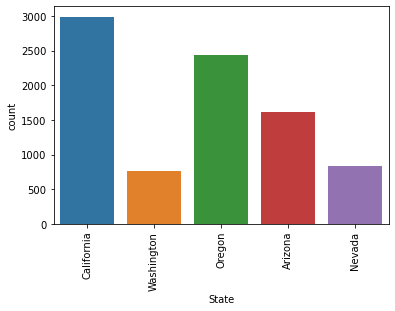

{'California': 2990, 'Oregon': 2442, 'Arizona': 1610, 'Nevada': 838, 'Washington': 757}
---
 
 

Response


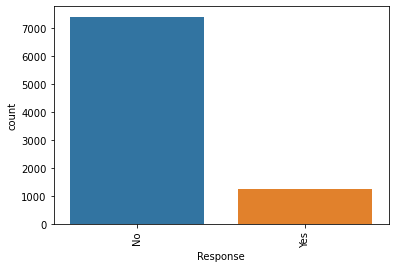

{'No': 7407, 'Yes': 1230}
---
 
 

Coverage


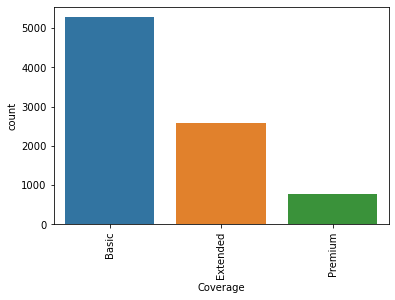

{'Basic': 5274, 'Extended': 2591, 'Premium': 772}
---
 
 

Education


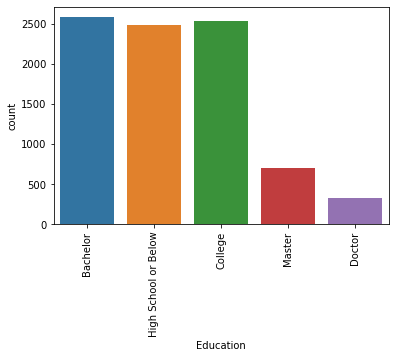

{'Bachelor': 2584, 'College': 2536, 'High School or Below': 2491, 'Master': 701, 'Doctor': 325}
---
 
 

EmploymentStatus


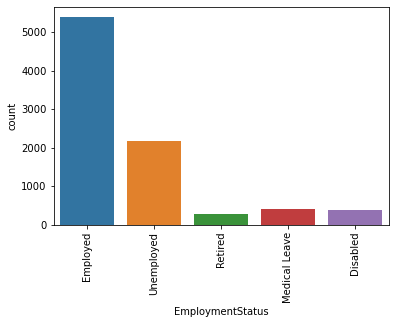

{'Employed': 5386, 'Unemployed': 2184, 'Medical Leave': 414, 'Disabled': 382, 'Retired': 271}
---
 
 

Gender


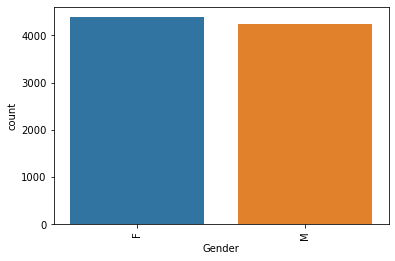

{'F': 4388, 'M': 4249}
---
 
 

Location Code


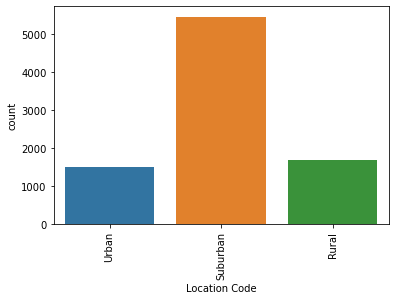

{'Suburban': 5459, 'Rural': 1675, 'Urban': 1503}
---
 
 

Marital Status


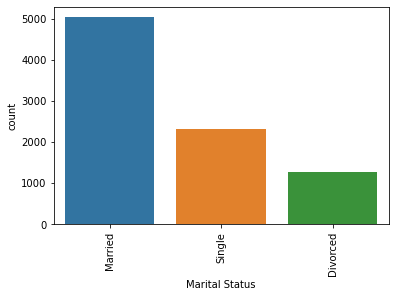

{'Married': 5031, 'Single': 2321, 'Divorced': 1285}
---
 
 

Policy Type


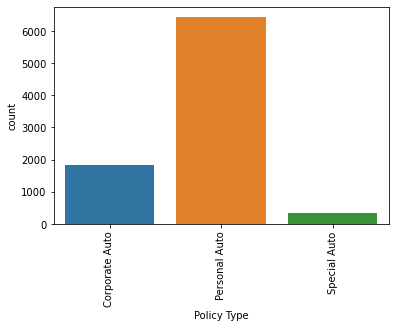

{'Personal Auto': 6434, 'Corporate Auto': 1847, 'Special Auto': 356}
---
 
 

Policy


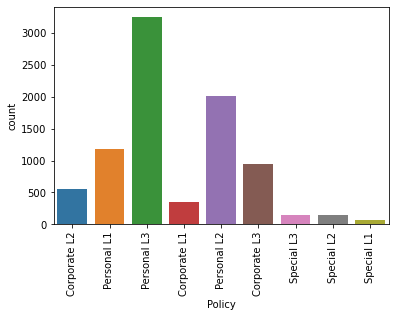

{'Personal L3': 3248, 'Personal L2': 2009, 'Personal L1': 1177, 'Corporate L3': 951, 'Corporate L2': 552, 'Corporate L1': 344, 'Special L2': 149, 'Special L3': 143, 'Special L1': 64}
---
 
 

Renew Offer Type


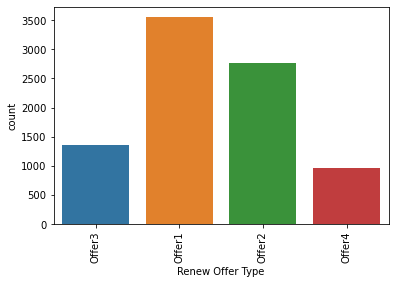

{'Offer1': 3551, 'Offer2': 2761, 'Offer3': 1356, 'Offer4': 969}
---
 
 

Sales Channel


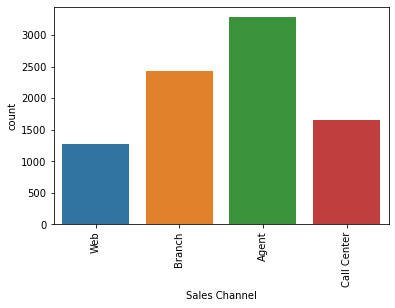

{'Agent': 3283, 'Branch': 2431, 'Call Center': 1655, 'Web': 1268}
---
 
 

Vehicle Class


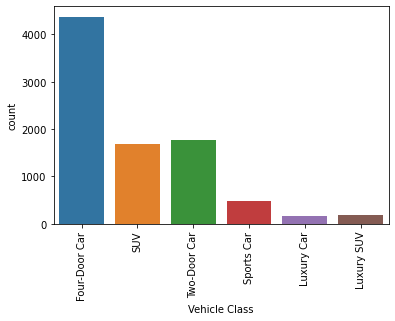

{'Four-Door Car': 4373, 'Two-Door Car': 1767, 'SUV': 1694, 'Sports Car': 471, 'Luxury SUV': 177, 'Luxury Car': 155}
---
 
 

Vehicle Size


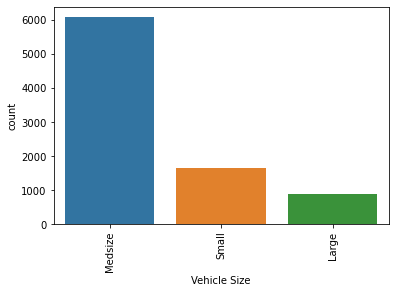

{'Medsize': 6084, 'Small': 1666, 'Large': 887}
---
 
 



In [7]:
categorical_features = data.select_dtypes(include='object').columns

for c in categorical_features :
    sns.countplot(data=data,x=c)
    plt.xticks(rotation=90)
    print(c)
    plt.show()
    print(data[c].value_counts().to_dict())
    print("---\n \n \n")

### Interpretation

`State` : The majority of the population is based in California and Oregon

`Response` : Most of the responses are No

`Education` : Bachelor, High School or below and College are approximatively the same amount where Master and Doctor are in a very small amount.

`Gender` : There is an even amount of Females and Males

`Location Code` : The majority of the customers are located in Suburbian areas

`Marital Status` : Majority of Married accounts

`Policy Type` + `Policy` : Majority of Personal Auto L3

`Renew Offer Type` : The most sent renew offers were Offer1 and Offer2 (read *1.2.a* for a contingency table with the offer types and their status)

`Vehicle Class` : High majority of Four-Door Cars

`Vehicle Size` : High Majority of medium sized vehicles

## 1.1.b Numerical Features

Variable : Income

Central tendency measurement :
 * Mean:  37670.27590598587
 * Median:  33816.0
Dispersion measurement :
 * Variance:  922810435.8600599
 * Standard deviation:  30377.79511189151
Shape measurement :
 * Skewness:  0.29011410257692105
 * Kurtosis:  -1.0891946355853834
P1 and P99 :
 * P1:  0.0
 * P25:  0.0
 * P75:  62262.0
 * P95:  90779.0
 * P99:  97861.15999999999


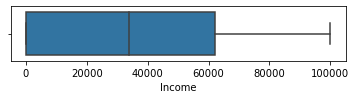

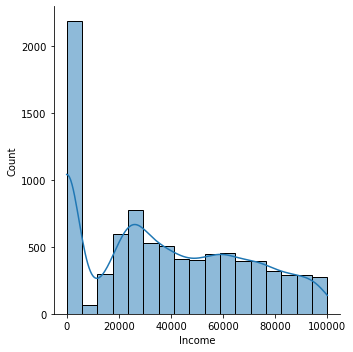

---





Variable : Monthly Premium Auto

Central tendency measurement :
 * Mean:  93.28285284242213
 * Median:  83.0
Dispersion measurement :
 * Variance:  1191.9444240483986
 * Standard deviation:  34.52454813677362
Shape measurement :
 * Skewness:  2.1195536219998883
 * Kurtosis:  6.147187703445288
P1 and P99 :
 * P1:  61.0
 * P25:  68.0
 * P75:  109.0
 * P95:  165.0
 * P99:  229.0


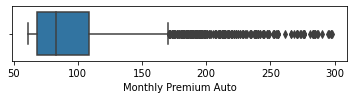

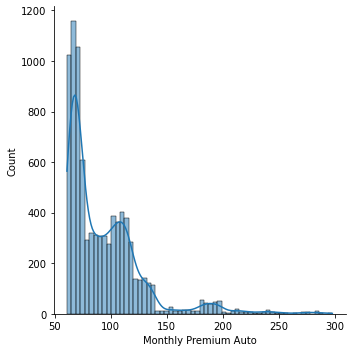

---





Variable : Months Since Last Claim

Central tendency measurement :
 * Mean:  15.15283084404307
 * Median:  14.0
Dispersion measurement :
 * Variance:  101.41417891465221
 * Standard deviation:  10.070460710148877
Shape measurement :
 * Skewness:  0.27208977532080153
 * Kurtosis:  -1.074081653463793
P1 and P99 :
 * P1:  0.0
 * P25:  6.0
 * P75:  23.0
 * P95:  33.0
 * P99:  35.0


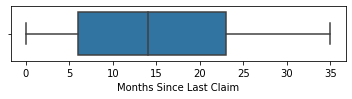

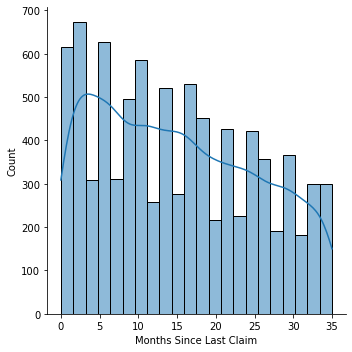

---





Variable : Months Since Policy Inception

Central tendency measurement :
 * Mean:  48.02744008336228
 * Median:  48.0
Dispersion measurement :
 * Variance:  777.4257840338369
 * Standard deviation:  27.882356142080905
Shape measurement :
 * Skewness:  0.04433624691340209
 * Kurtosis:  -1.1349778673084285
P1 and P99 :
 * P1:  1.0
 * P25:  24.0
 * P75:  71.0
 * P95:  93.0
 * P99:  98.0


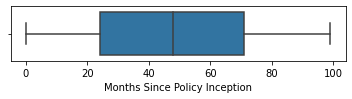

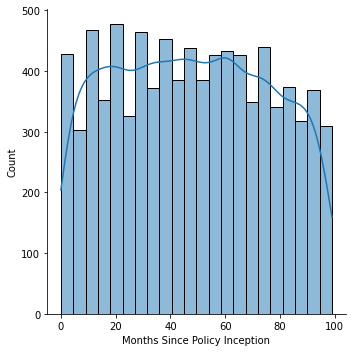

---





Variable : Number of Open Complaints

Central tendency measurement :
 * Mean:  0.38161398633784877
 * Median:  0.0
Dispersion measurement :
 * Variance:  0.8241519394500156
 * Standard deviation:  0.9078281442266568
Shape measurement :
 * Skewness:  2.7962926698994366
 * Kurtosis:  7.826530307528902
P1 and P99 :
 * P1:  0.0
 * P25:  0.0
 * P75:  0.0
 * P95:  3.0
 * P99:  4.0


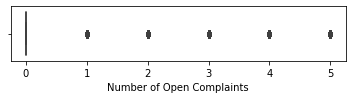

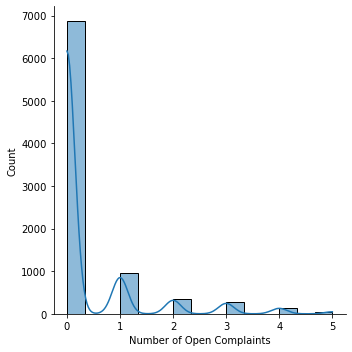

---





Variable : Number of Policies

Central tendency measurement :
 * Mean:  2.967465555169619
 * Median:  2.0
Dispersion measurement :
 * Variance:  5.707520877735846
 * Standard deviation:  2.3890418325629725
Shape measurement :
 * Skewness:  1.2514265227049022
 * Kurtosis:  0.363066954117353
P1 and P99 :
 * P1:  1.0
 * P25:  1.0
 * P75:  4.0
 * P95:  8.0
 * P99:  9.0


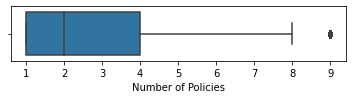

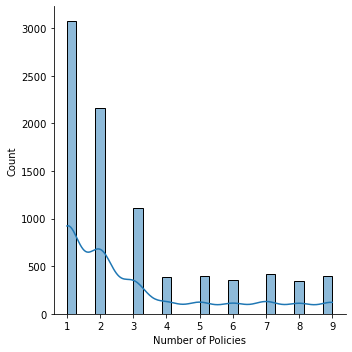

---





Variable : Total Claim Amount

Central tendency measurement :
 * Mean:  434.5294812961669
 * Median:  383.79736299999996
Dispersion measurement :
 * Variance:  84401.60255904608
 * Standard deviation:  290.51953903144977
Shape measurement :
 * Skewness:  1.7027133163260957
 * Kurtosis:  5.8568568619409955
P1 and P99 :
 * P1:  10.44176324
 * P25:  272.217171
 * P75:  547.619785
 * P95:  962.6306503999974
 * P99:  1405.14020356


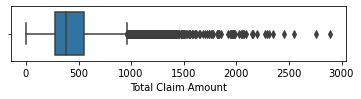

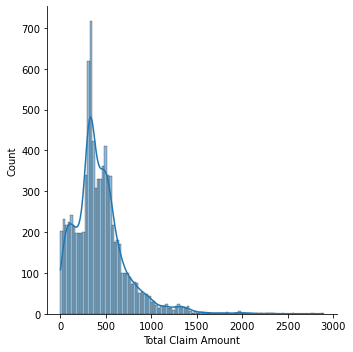

---





Variable : CLV

Central tendency measurement :
 * Mean:  7999.90384160275
 * Median:  5797.604861
Dispersion measurement :
 * Variance:  46900278.14599537
 * Standard deviation:  6848.3777747723125
Shape measurement :
 * Skewness:  3.0201735252388295
 * Kurtosis:  13.767969612870852
P1 and P99 :
 * P1:  2231.12680436
 * P25:  3997.4763020000005
 * P75:  8937.118615000001
 * P95:  22095.59438399999
 * P99:  35928.64222559998


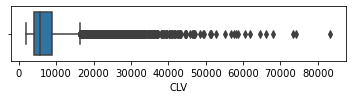

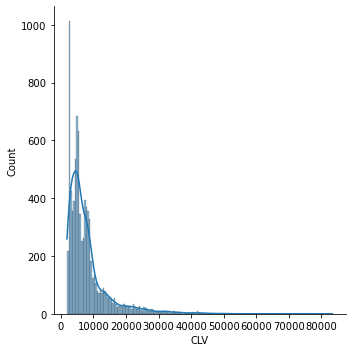

---







,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,CLV
count,8637.000000,8637.000000,8637.000000,8637.00000,8637.000000,8637.000000,8637.000000,8637.000000
mean,37670.275906,93.282853,15.152831,48.02744,0.381614,2.967466,434.529481,7999.903842
std,30379.553849,34.526547,10.071044,27.88397,0.907881,2.389180,290.536359,6848.774265
min,0.000000,61.000000,0.000000,0.00000,0.000000,1.000000,0.099007,1898.683686
25%,0.000000,68.000000,6.000000,24.00000,0.000000,1.000000,272.217171,3997.476302
50%,33816.000000,83.000000,14.000000,48.00000,0.000000,2.000000,383.797363,5797.604861
75%,62262.000000,109.000000,23.000000,71.00000,0.000000,4.000000,547.619785,8937.118615
max,99981.000000,298.000000,35.000000,99.00000,5.000000,9.000000,2893.239678,83325.381190


In [8]:
numerical_features = data.select_dtypes(include=np.number).columns

for c in numerical_features :
    print(f"Variable : {c}\n")
    print("Central tendency measurement :")
    print(" * Mean: ",data[c].mean())
    print(" * Median: ",data[c].median())
    print("Dispersion measurement :")
    print(" * Variance: ",data[c].var(ddof=0))
    print(" * Standard deviation: ",data[c].std(ddof=0))
    print("Shape measurement :")
    print(" * Skewness: ",data[c].skew())
    print(" * Kurtosis: ",data[c].kurtosis())
    print("P1 and P99 :")
    print(" * P1: ",data[c].quantile(0.01))
    print(" * P25: ",data[c].quantile(0.25))
    print(" * P75: ",data[c].quantile(0.75))
    print(" * P95: ",data[c].quantile(0.95))
    print(" * P99: ",data[c].quantile(0.99))
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=c, data=data)
    plt.xlabel(c)
    plt.show()
    sns.displot(x=c, data=data, kde=True)
    plt.show()
    print("---\n\n\n\n\n")

data[numerical_features].describe()

### Interpretation

`Income` : Values are mostly distributed between 0\\$ (unemployed) and 60000\\$ with a median of 33816\\$
<br>The amount of Income = 0 is the same as Unemployed customers.

`Monthly Premium Auto` : This data needs to be explained since there is a huge amount of outliers to the right since we can't interpret them with this few amount of information. The mean of monthly subscription fee is 93\\$ and ranged between 60\\$ and 300\\$

`Months since Last Claim` : The majority of claims are happening before 20 months.

`Number of Open Complaints` : The high majority of accounts don't have open complaints, this can be seen on the boxplot where number of complaints higher than 0 are showed as outliers.

`Months since Policy Inception` : Looking at the shape of the slope and metrics, we can see a skewness of 0.04,  so the values are symmetrically distributed.
<br>The negative kurtosis means that our slope is platykurtic, hence the flattened shape.

`Number of Policies` : Most of the customers renewed their policies 2 or 3 times.

`Total Claim Amount` : The majority of the claims are between 250\\$ and 550\\$, however a huge amount of outliers are visible between 900\\$ and 3000\\$
<br>The P95 is 962\\$ meaning that the outliers are representing 5\% of the claims.

`CLV` : The score feature we need to analyze. **This is the key feature of the dataset.**
<br>The mean is around 8000 correlating with the 8000 default value used in the test dataset.
<br>The median is situated around 5800, and 75% of the values are below 9000.
<br>A high CLV is rare, only 15% of the dataset.
<br>The highest CLV are very rare representing only 5% of the values higher than 22000.

# 1.2 Bivariate descriptive statistics

## 1.2.a Numerical Features

Text(0.5, 1.0, 'Features correlation matrix')

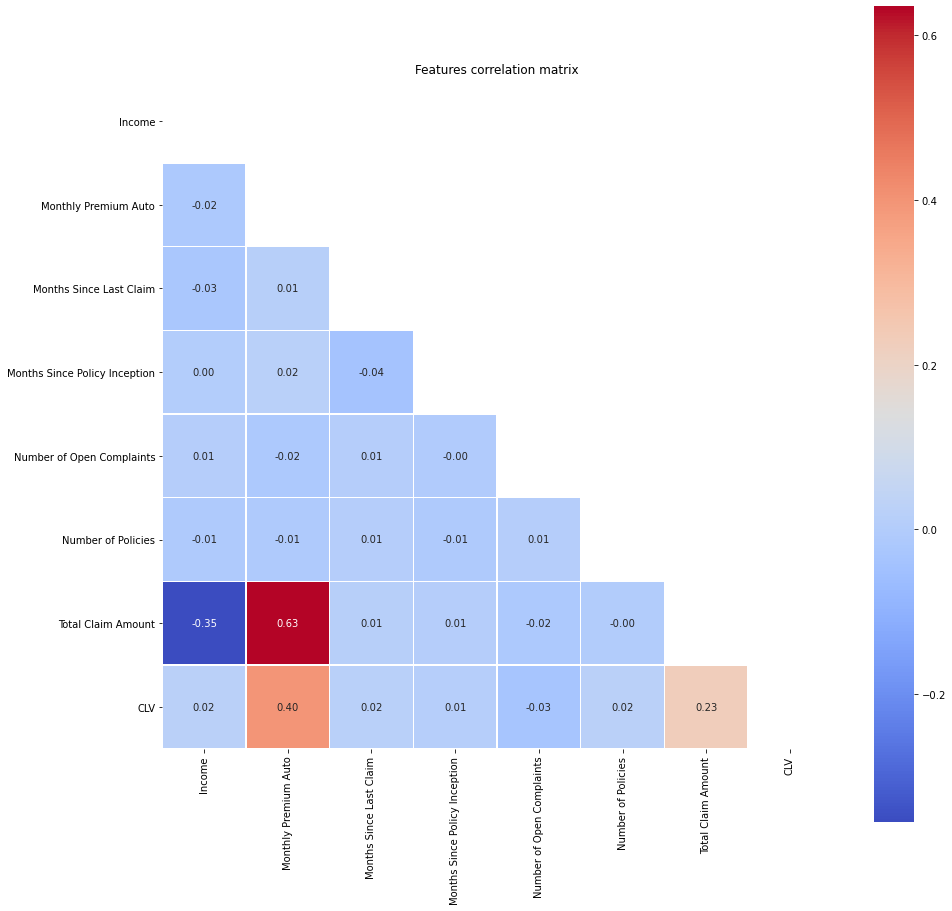

In [9]:
#Creating a correlation map between the numerical features
corr_matrix = data.corr()
mask = np.triu(corr_matrix)
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='coolwarm', mask=mask, linewidths=.5, cbar=True, square=True, annot=True, fmt=".2f")
plt.title("Features correlation matrix")

The upper features correlation matrix highlists the correlations that can exist between numerical features.

The table indicates correlations based on an index represented by a temperature color. The warmer the color, the higher the **positive** correlation is.
<br>The colder the color, the higher the **negative** correlation is.

This index is called the Pearson correlation coefficient, r, taking a range from +1 to -1, a value of 0 indicating that there is no association between the two variables.

    As we can see 4 cells give information about correlations.

- A negative correlation between `Total Claim Amount` and `Income`.
    This means that the higher the customer income is, the less money is going to be claimed when a complaint is opened.
    
- A small positive correlation between `Total Claim Amount` and `CLV`.
    We can understand that the calculation method for the CLV is quite dependant on the `Total Claim Amount` since the higher the amount, the higher the CLV.
    
- A positive correlation between `Monthly Premium Auto` and `CLV`.
    Exactly like the previous correlation, the higher amount of money the customer will pay for an insurance, the higher the CLV will be.
   
- A strong correlation between `Total Claim Amount` and `Monthly Premium Auto`.
    This means that the higher the customer is paying every month for an insurance, the higher the amount of money will be claimed for.

(0.09900700000000001, 2893.239678)

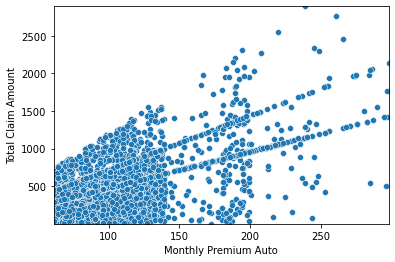

In [10]:
#Building scatterplot to find correlations between two numerical features
c1 = "Monthly Premium Auto"
c2 = "Total Claim Amount"

sns.scatterplot(x=c1, y=c2, data=data)
plt.xlim(data[c1].min(), data[c1].max())
plt.ylim(data[c2].min(), data[c2].max())

We draw a scatterplot between `Monthly Premium Auto` and `Total Claim Amount` to find any correlations.

We can definitely see two lines in the graph that may represent a subscription model offer for customers.

Text(0, 0.5, 'Policy')

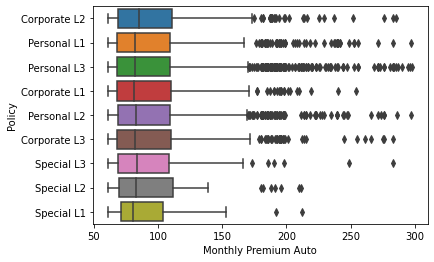

In [11]:
c1 = "Monthly Premium Auto"
c2 = "Policy"

sns.boxplot(x=c1, y=c2, data=data)
plt.xlabel(c1)
plt.ylabel(c2)

We want to see if there is any correlations between `Monthly Premium Auto` and `Policy`.


### Interpretation
The interesting information can be seen within the outliers.

- Personal L3 contains the most outliers that would represent special monthly insurance prices.

- Special Policies are the one that contain the less outliers, surely because they must be custom made policies for special customers.

## 1.2.b Categorical Features

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Offer1'),
  Text(0, 1.5, 'Offer2'),
  Text(0, 2.5, 'Offer3'),
  Text(0, 3.5, 'Offer4'),
  Text(0, 4.5, 'All')])

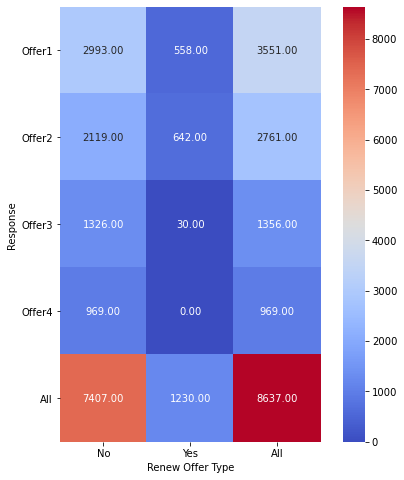

In [12]:
#Building a contingency table to find correlations between 2 categorical features
c1 = "Renew Offer Type"
c2 = "Response"

contingency = pd.crosstab(index=data[c1], columns=data[c2], margins=True)
plt.figure(figsize=(8,8))
sns.heatmap(contingency, cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.xlabel(c1)
plt.ylabel(c2)
plt.yticks(rotation=360)

Since categorical features can't be added in the features correlation matrix, we need to build a contingency table like the one above.

This table is also showing a temperature color code. The index is the amount of accounts that satisfies both criterias

    For example : First cell (Offer1 & No) = 2993.
    This means that 2993 customers refused the Offer1

The Offer1 was the most sent with an approval rate of 19%

    Offer1 : 19% approval rate
    Offer2 : 30% approval rate
    Offer3 : 2% approval rate
    Offer4 : 0% approval rate

The Offer2 was the most accepted `Renew Offer Type`.

Text(0, 0.5, 'Income')

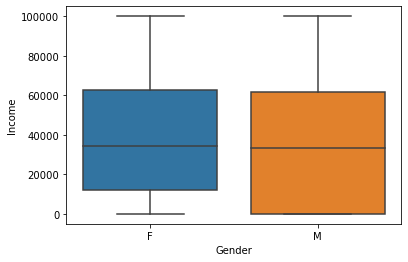

In [13]:
#Building a boxplot to find correlations between one categorical feature and one numerical feature
c1 = "Gender"
c2 = "Income"

sns.boxplot(x=c1, y=c2, data=data)
plt.xlabel(c1)
plt.ylabel(c2)

In this test we are comparing `Income` and `Gender` to find correlations or disparities.

We can see that the amount of Males and Females *(as seen previously in 1.1.a)* is equal, however we can find a difference in `Income` regarding the Male category for low incomes.
<br>The first quartile for Female Income is close to 15000\\$ whether for the Male Income it is close to 0\\$

For the high incomes, Males and Females are very close.

Thus, we need to do a deeper analysis by comparing `EmploymentStatus` and `Gender` to find any inconsistencies.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Disabled'),
  Text(0, 1.5, 'Employed'),
  Text(0, 2.5, 'Medical Leave'),
  Text(0, 3.5, 'Retired'),
  Text(0, 4.5, 'Unemployed'),
  Text(0, 5.5, 'All')])

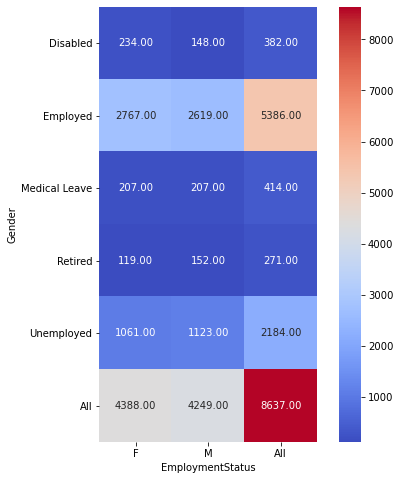

In [14]:
c1 = "EmploymentStatus"
c2 = "Gender"

contingency = pd.crosstab(index=data[c1], columns=data[c2], margins=True)
plt.figure(figsize=(8,8))
sns.heatmap(contingency, cmap="coolwarm", square=True, annot=True, fmt=".2f")
plt.xlabel(c1)
plt.ylabel(c2)
plt.yticks(rotation=360)

We decide to draw a contingency table of `EmploymentStatus` and `Gender`.

Unemployed customers are representing 25% of our sample equally distributed between Males and Females.
All the `EmploymentStatus` features are equally distributed between Males and Females except for Disabled customers which are 1.6 times more numerous for Females.

We don't find any explanation about the previous table where the first quartile for Male income was significantly lower than Female's one.

## 1.3 Claims Verification

We are assessing a claim on our data based on the result of the descriptive analysis. This is done to check any false information that would alter the results of our model.

Our claim is
    
    Income == 0 and EmploymentStatus == unemployed
    
In other words, we need to verify if all acounts displaying an income equal to 0 are also Unemployed and vice versa.

In [15]:
#1.3.1 - Income = 0 and EmploymentStatus != unemployed

data[data["Income"] == 0]["EmploymentStatus"].value_counts()

Unemployed    2184
Name: EmploymentStatus, dtype: int64

Text(0, 0.5, 'EmploymentStatus')

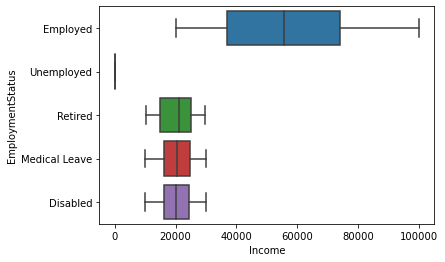

In [16]:
c1 = "Income"
c2 = "EmploymentStatus"

sns.boxplot(x=c1, y=c2, data=data)
plt.xlabel(c1)
plt.ylabel(c2)

#CLAIM CORRECT NO DROP

The claim is verified and correct, all Unemployed accounts have an Income of 0 and vice versa.

Thus, we don't drop any data from the dataset.

# 2. Data Preprocessing

## 2.1.a Outliers

During our descriptive analysis, we discovered a high amount of outliers, however we decided to keep them since they bring valuable information in our dataset.
Most of the time outliers must be dropped or edited because they alter too much the models, perhaps in this context, outliers represent special customers with special contracts and need to be taken into account.

    
**We decide to keep our outliers because they stand for valued customers by the company.**

## 2.1.b Drops

We don't drop any information outside of the `CustomerID` feature *(dropped in 1.0)* since we find them valuable enough for the model.

In [17]:
#Backup of data frame
datac = data.copy()

In [18]:
datac.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV
0,California,No,Basic,Bachelor,Employed,F,48269,Urban,Married,69,3,79,3,1,Corporate Auto,Corporate L2,Offer3,Web,282.151207,Four-Door Car,Medsize,2683.470677
1,Washington,No,Basic,High School or Below,Unemployed,M,0,Suburban,Single,113,19,10,0,7,Personal Auto,Personal L1,Offer1,Branch,813.600000,SUV,Medsize,7859.414569
2,Oregon,No,Extended,College,Employed,M,60145,Urban,Single,132,8,28,0,3,Personal Auto,Personal L3,Offer3,Web,580.473259,SUV,Medsize,10272.608200
3,California,No,Basic,High School or Below,Employed,M,46131,Suburban,Married,74,27,28,0,1,Personal Auto,Personal L3,Offer2,Branch,355.200000,Two-Door Car,Small,2969.593296
4,Washington,No,Basic,Bachelor,Unemployed,F,0,Suburban,Single,64,12,24,0,1,Personal Auto,Personal L3,Offer2,Agent,460.800000,Four-Door Car,Medsize,2310.882998


## 2.2 Encoding

Many machine learning algorithms cannot operate on label data directly. They require all input variables and output variables to be numeric.

Since our dataset contains a high amount of categorical features, and leaving them as they are would confuse the model when training it, we have to encode our categorical data into numerical data.

We are using 2 methods, the categorical features that contain only 2 options (`Gender` and `Response`) can be encoded as boolean features.

The other features need to be encoded to numerical features using the One Hot Encoding method.
<br>The One Hot Encoding method is used instead of the Integer Encoding method since our data are **nominal categorical** features and **not ordinal**.
<br>We don't want the model to think there is a hierarchy between our values, so this is why the One Hot Encoding method is more suitable.

This method replaces a feature by the amount of different options it contains.
For example `Marital Status` contains : *Married, Single, Divorced*.
<br>We want to encode them with the One Hot Encoding method.

We will replace `Marital Status` by 3 columns with the associated Option as a suffix : `Marital Status_Married`, `Marital Status_Single`, `Marital Status_Divorced`. 
<br>These new columns are encoded with Binary values that we can call "dummy variables".
<br>*To read how the data are encoded with the One Hot Encoding method, the new processed dataset is displayed below*

We also need to delete one column every time we encode a feature with this method since we need the sum of the columns to not be 1 to avoid multicolinearity issues.

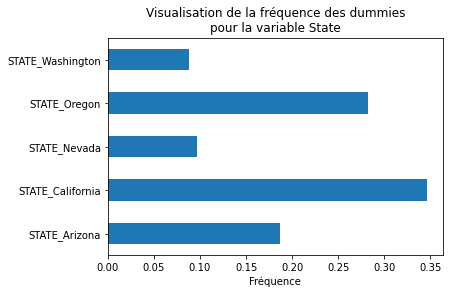

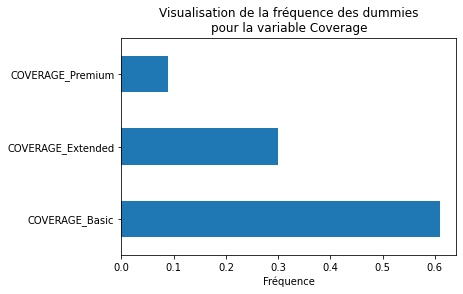

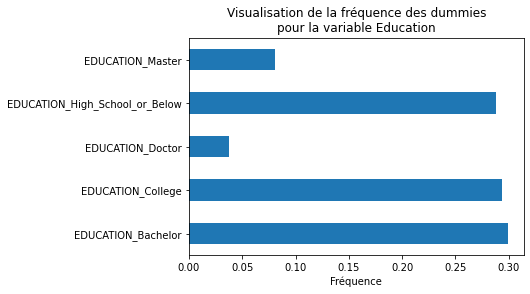

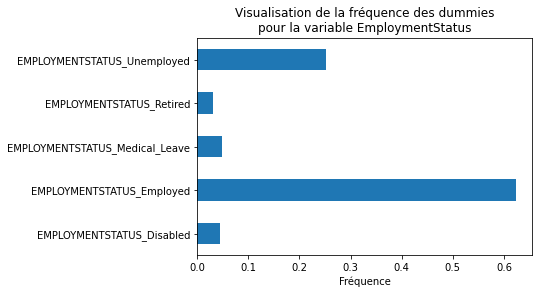

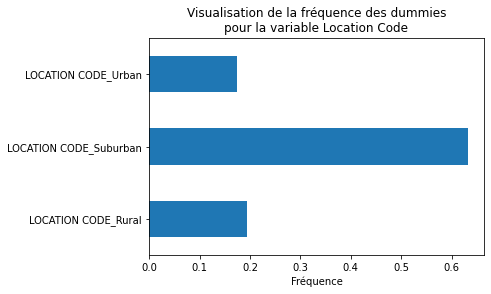

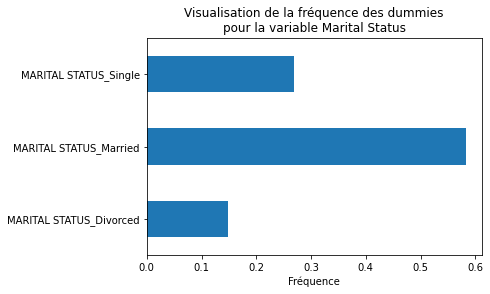

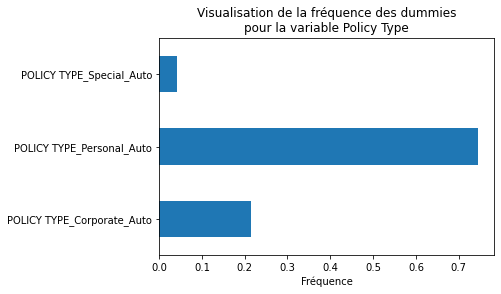

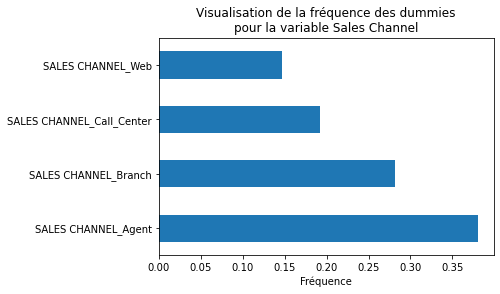

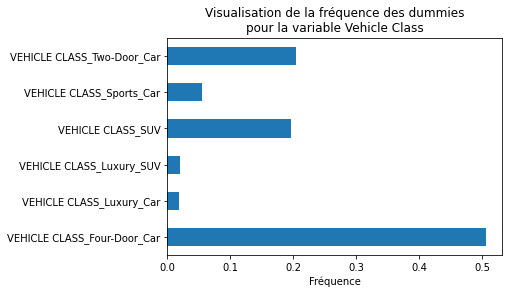

In [19]:
#Encoding categorical nominal features with One Hot Encoding method

for column in ['State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Sales Channel', 'Vehicle Class']:
    dummies = pd.get_dummies(datac[column])
    dummies.columns = ['_'.join([column.upper(), str(c).replace(' ', '_')]) for c in dummies.columns]
    plt.figure()
    dummies.mean().plot(kind='barh')
    plt.title(f'Visualisation de la fréquence des dummies\npour la variable {column}')
    plt.xlabel('Fréquence')
    plt.show()
    dummies.drop(dummies.columns[-1], axis=1, inplace=True)
    datac = datac.drop(column, axis=1)
    datac = pd.concat([datac.T, dummies.T]).T

In [20]:
datac.columns

Index(['Response', 'Gender', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy',
       'Renew Offer Type', 'Total Claim Amount', 'Vehicle Size', 'CLV',
       'STATE_Arizona', 'STATE_California', 'STATE_Nevada', 'STATE_Oregon',
       'COVERAGE_Basic', 'COVERAGE_Extended', 'EDUCATION_Bachelor',
       'EDUCATION_College', 'EDUCATION_Doctor',
       'EDUCATION_High_School_or_Below', 'EMPLOYMENTSTATUS_Disabled',
       'EMPLOYMENTSTATUS_Employed', 'EMPLOYMENTSTATUS_Medical_Leave',
       'EMPLOYMENTSTATUS_Retired', 'LOCATION CODE_Rural',
       'LOCATION CODE_Suburban', 'MARITAL STATUS_Divorced',
       'MARITAL STATUS_Married', 'POLICY TYPE_Corporate_Auto',
       'POLICY TYPE_Personal_Auto', 'SALES CHANNEL_Agent',
       'SALES CHANNEL_Branch', 'SALES CHANNEL_Call_Center',
       'VEHICLE CLASS_Four-Door_Car', 'VEHICLE CLASS_Luxury_Car',
       'VEHICLE CLASS_Luxury_SUV

*Do you know Kristoff? He is a really nice and smart guy! 🧠*

In [21]:
datac["Response"].value_counts()

No     7407
Yes    1230
Name: Response, dtype: int64

In [22]:
#Encoding boolean categorical features

datac["Response"] = datac["Response"].replace({"Yes":1,"No":0})
datac["Gender"] = datac["Gender"].replace({"M":1,"F":0})

In [23]:
datac["Response"].value_counts()

0    7407
1    1230
Name: Response, dtype: int64

In [24]:
datac["Gender"].value_counts()

0    4388
1    4249
Name: Gender, dtype: int64

In [25]:
#Encoding ordinal categorical features with label encoding

datac["Vehicle Size"] = datac["Vehicle Size"].replace({"Small":1,"Medsize":2,"Large":3})

#Simplifying this feature by only keeping the "LX" information since the PolicyType is already a feature
datac["Policy"] = datac["Policy"].replace({'Personal L3': 3, 'Personal L2': 2, 'Personal L1': 1, 'Corporate L3': 3, 'Corporate L2': 2, 'Corporate L1': 1, 'Special L2': 2, 'Special L3': 3, 'Special L1': 1})

datac["Renew Offer Type"] = datac["Renew Offer Type"].replace({'Offer1': 1, 'Offer2': 2, 'Offer3': 3, 'Offer4': 4})

In [26]:
#The whole dataset is only containing numerical features for the model training
datac

,Response,Gender,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy,Renew Offer Type,Total Claim Amount,Vehicle Size,CLV,STATE_Arizona,STATE_California,STATE_Nevada,STATE_Oregon,COVERAGE_Basic,COVERAGE_Extended,EDUCATION_Bachelor,EDUCATION_College,EDUCATION_Doctor,EDUCATION_High_School_or_Below,EMPLOYMENTSTATUS_Disabled,EMPLOYMENTSTATUS_Employed,EMPLOYMENTSTATUS_Medical_Leave,EMPLOYMENTSTATUS_Retired,LOCATION CODE_Rural,LOCATION CODE_Suburban,MARITAL STATUS_Divorced,MARITAL STATUS_Married,POLICY TYPE_Corporate_Auto,POLICY TYPE_Personal_Auto,SALES CHANNEL_Agent,SALES CHANNEL_Branch,SALES CHANNEL_Call_Center,VEHICLE CLASS_Four-Door_Car,VEHICLE CLASS_Luxury_Car,VEHICLE CLASS_Luxury_SUV,VEHICLE CLASS_SUV,VEHICLE CLASS_Sports_Car
0,0,0,48269,69,3,79,3,1,2,3,282.151,2,2683.47,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0
1,0,1,0,113,19,10,0,7,1,1,813.6,2,7859.41,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0,1,60145,132,8,28,0,3,3,3,580.473,2,10272.6,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,1,46131,74,27,28,0,1,3,2,355.2,1,2969.59,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0
4,0,0,0,64,12,24,0,1,3,2,460.8,2,2310.88,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8632,0,1,0,68,10,48,1,3,3,3,326.4,2,4704.18,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0
8633,0,0,67572,102,7,55,0,2,1,1,296.209,1,24826.9,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1
8634,1,0,25147,101,7,54,0,1,1,1,694.598,2,3600.93,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0
8635,0,0,0,101,17,20,0,3,2,1,978.257,2,7482.85,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0


In [27]:
datac["CLV"].min()

1898.6836859999999

# 2.3 Data Normalization

We decide to normalize the dataset before using it to train the model.
The data range value is very wide and there is a strong inertia on the data, so we prefer to normalize them to help the model have a better understanding of them.

Data normalization is a scaling technique where values are shifted and rescaled to end up between a smaller range.
<br>In this context we normalize based on the Zscore on AzureML.

Moreoever we decide to apply a logarithmic normalization **separately** of the other data on the `CLV` feature for the same reasons as stated before and also because of the asymmetry of the data.
<br>*We DO NOT apply the Zscore normalization on the CLV*

We don't forget to apply the exponential function to `CLV` before creating the new CSV file.

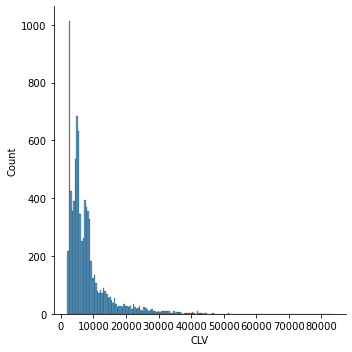

In [28]:
#Log normalisation of CLV
sns.displot(datac["CLV"])

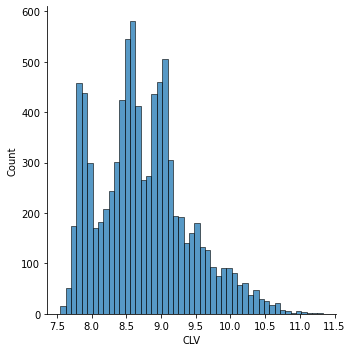

In [29]:
#ONLY RUN IT ONCE!!! ⛔
datac["CLV"] = np.log(datac["CLV"].astype(float))
sns.displot(datac["CLV"])

*Yoko for the win* 🐕
![](Yoko_ASCII_small.png)

# 3. Models

## 3.1 Tested models

We decided to use 5 different regression model types for our dataset.

- Bayesian Linear Regression
    <br>Our baseline model. It is a linear regression using probability distribution rather than point estimates.
    <br>However it is most efficient when dealing with insufficient data or poor distributed data, what is not the case with this dataset.
- Poisson Regression
    <br>An other linear regression model
    <br>Used to tell which X-values work on Y-values.
- Decision Forest Regression
    <br>This regression model consists of an ensemble of decision trees.
    <br>A Random Forest operates by constructing several decision trees during training time and outputting the mean of the classes as the prediction of all the trees.
- Boosted Decision Tree Regression
    <br>Like a Random Forest model, this model also uses boosting methods.
    <br>Each tree is dependent on prior trees.
    <br>The algorithm learns by fitting the residual of the trees that preceded it, tending to improve accuracy with some small risk of less coverage.
- Neural network Regression
    <br>A flexible model structured like a brain nervous system used for classification and regression.

## 3.2 Best Model

Based on our results the best model is the **Decision Forest Regression** with these metrics

**RMSE : 0.191036**
<br>**r² : 0.915563**
<br>This model fits at **91.56%** to our test data.

Here are the hyperparameters used in this model :

    Min num of samples per leaf node : 1
    The minimum of data points we have allowed in a leaf node.

    Number of random splits per node : 128
    The amount splits to use when building each node of the tree.
    
    Max depth of the decision trees : 64
    Limiting the maxium depth of a decision tree. The higher it is, the better should be the precision but at the risk of some overfitting.
    
    Number of decision trees : 32
    The amount of decision trees created, the higher the better the coverage.
    
Based on these results, we can assume that this model is the best we have trained in this data analysis and would be the most efficient to find the CLV of the new customers.

# 4. Results Comparison

We have decided to create two CSV files, the first that will be used below containing the `CLV` calculated by our model and all the features of the dataset.
<br>The second CSV file is containing only the `CLV` calculated by our model and the `CustomerID` so the results are easier to read.
    
**The second CSV file will be uploaded for the assignment.**

Before claiming that our analysis is finished, we need finally to compare the results we got from our model with the data we had initially in the training dataset.
<br>This analysis is not mandatory but will verify our assumptions with the results obtained from the model.
<br>We are going to compare the first dataset `CLV-Training.csv` and `NewCLV-Test.csv` based on their distribution.

In [30]:
#Loading the dataset in memory
dataTest = pd.read_csv("NewCLV-Test.csv")

#Displaying all columns of the dataset
pd.set_option('display.max_columns', None)
dataTest.describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,CLV,Scored Label Mean,Scored Label Standard Deviation
count,646.00000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.0,646.000000,646.000000
mean,37267.80031,93.266254,13.930341,48.982972,0.400929,2.927245,434.001407,8000.0,11067.487103,1.334813
std,30701.95353,32.752873,9.911693,27.307290,0.915973,2.394950,289.401913,0.0,6282.740652,0.212721
min,0.00000,61.000000,0.000000,0.000000,0.000000,1.000000,1.838367,8000.0,4867.267188,1.053273
25%,0.00000,69.000000,6.000000,28.000000,0.000000,1.000000,273.751194,8000.0,5880.975771,1.099571
50%,35862.00000,86.000000,12.000000,50.000000,0.000000,2.000000,386.031248,8000.0,10057.614448,1.327071
75%,63774.00000,109.000000,22.000000,70.000000,0.000000,4.000000,553.800000,8000.0,12772.061558,1.509201
max,99841.00000,295.000000,35.000000,99.000000,5.000000,9.000000,2327.166394,8000.0,38883.461085,1.848631


In [31]:
data.describe()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,CLV
count,8637.000000,8637.000000,8637.000000,8637.00000,8637.000000,8637.000000,8637.000000,8637.000000
mean,37670.275906,93.282853,15.152831,48.02744,0.381614,2.967466,434.529481,7999.903842
std,30379.553849,34.526547,10.071044,27.88397,0.907881,2.389180,290.536359,6848.774265
min,0.000000,61.000000,0.000000,0.00000,0.000000,1.000000,0.099007,1898.683686
25%,0.000000,68.000000,6.000000,24.00000,0.000000,1.000000,272.217171,3997.476302
50%,33816.000000,83.000000,14.000000,48.00000,0.000000,2.000000,383.797363,5797.604861
75%,62262.000000,109.000000,23.000000,71.00000,0.000000,4.000000,547.619785,8937.118615
max,99981.000000,298.000000,35.000000,99.00000,5.000000,9.000000,2893.239678,83325.381190


In [32]:
#We drop CLV column containing default CLV (8000) and Scored Label Standard Deviation, since they won't bring any information
dataTest = dataTest.drop(["CLV","Scored Label Standard Deviation"], axis=1)

In [33]:
dataTest = dataTest.rename({"Scored Label Mean":"CLV"}, axis=1)

## 4.1 Comparison with `CLV`
We are going to compare the `CLV` distribution between `CLV-Training.csv` and `NewCLV-Test.csv`,

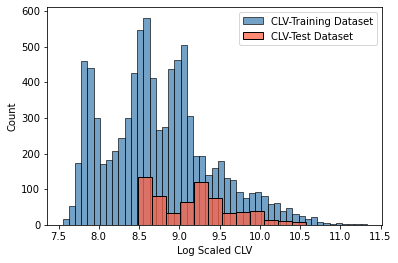

In [34]:
#Display plots separately
#sns.displot(np.log(dataTest["CLV"].astype(float)))
#sns.displot(np.log(data["CLV"].astype(float)))

fig, ax = plt.subplots()
for a,c in [(np.log(data["CLV"].astype(float)),"steelblue"), (np.log(dataTest["CLV"].astype(float)),"tomato")]:
    sns.histplot(a, ax=ax, kde=False, color=c)
plt.legend(["CLV-Training Dataset","CLV-Test Dataset"])
plt.xlabel("Log Scaled CLV")
plt.show()

In [35]:
datab = data.copy()

datab = datab[(datab["CLV"] >= dataTest["CLV"].min()) & (datab["CLV"] <= dataTest["CLV"].max())]

## 4.2 Comparison between `Gender` and `CLV`

In [36]:
datab.groupby("Gender").describe()["CLV"]

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,2806.0,10263.617243,6356.954470,4867.378203,5884.885390,8085.428783,11619.577798,38496.94701
M,2705.0,9968.858183,5861.059753,4869.596443,6019.960469,8044.872393,11430.588450,38545.70689


In [37]:
dataTest.groupby("Gender").describe()["CLV"]

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,333.0,11650.368170,6716.111635,4867.267188,6012.811743,10292.791172,13699.634130,38883.461085
M,313.0,10447.361241,5732.059211,4889.354819,5856.561826,9462.252457,12108.725439,36758.362070


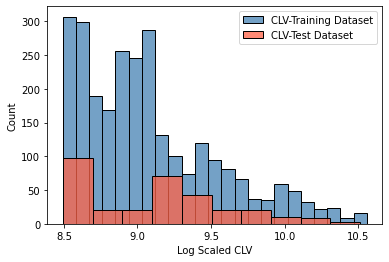

In [38]:
#Filtering Males
fig, ax = plt.subplots()
df_train = datab[datab["Gender"] == "M"]
df_test = dataTest[dataTest["Gender"] == "M"]

for a,c in [(np.log(df_train["CLV"].astype(float)),"steelblue"), (np.log(df_test["CLV"].astype(float)),"tomato")]:
    sns.histplot(a, ax=ax, kde=False, color=c)
plt.legend(["CLV-Training Dataset","CLV-Test Dataset"])
plt.xlabel("Log Scaled CLV")
plt.show()

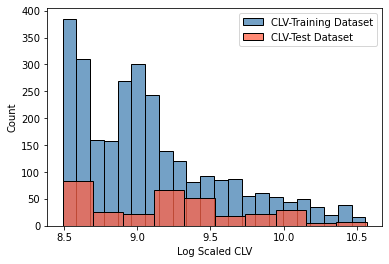

In [39]:
#Filtering Females
fig, ax = plt.subplots()
df_train = datab[datab["Gender"] == "F"]
df_test = dataTest[dataTest["Gender"] == "F"]

for a,c in [(np.log(df_train["CLV"].astype(float)),"steelblue"), (np.log(df_test["CLV"].astype(float)),"tomato")]:
    sns.histplot(a, ax=ax, kde=False, color=c)
plt.legend(["CLV-Training Dataset","CLV-Test Dataset"])
plt.xlabel("Log Scaled CLV")
plt.show()

We can clearly see close distribution between the two datasets.

Male and Female are equally distributed in both datasets

`CLV-Training.csv` : 50.92%
<br>`CLV-Test.csv` : 51.55%

# 4.3 Comparison between `Income` and `CLV`

In [40]:
datab.groupby("EmploymentStatus").describe()["CLV"]

,count,mean,std,min,25%,50%,75%,max
EmploymentStatus,,,,,,,,
Disabled,239.0,10424.199526,6342.929899,4867.378203,6503.397049,8257.666512,11780.771900,37150.82945
Employed,3622.0,10030.802460,6174.584176,4868.807554,5789.477247,8043.657772,11012.905323,38545.70689
Medical Leave,227.0,10564.006980,6391.845200,4869.596443,6098.229671,8281.740124,12356.156965,36860.90798
Retired,150.0,10869.172063,5848.023970,4873.436612,6273.911874,9310.770644,12168.744920,30591.61257
Unemployed,1273.0,10144.631403,5896.279282,4872.016380,6439.330195,7984.086473,11885.967970,38055.20953


In [41]:
dataTest.groupby("EmploymentStatus").describe()["CLV"]

,count,mean,std,min,25%,50%,75%,max
EmploymentStatus,,,,,,,,
Disabled,31.0,12783.184825,6256.092208,4957.917744,9604.974583,11153.477177,18028.192741,29364.950740
Employed,399.0,10721.628507,6202.272394,4867.267188,5796.022598,9618.435102,12195.413600,37636.508584
Medical Leave,20.0,8967.662630,4257.377642,5734.383870,5843.414559,7259.083131,10892.759980,22119.107796
Retired,18.0,16774.004437,5612.832134,5846.913821,15042.063398,17881.063744,21537.454176,22227.313506
Unemployed,178.0,11202.824900,6412.799867,4901.150915,6110.383818,10182.836753,12570.924768,38883.461085


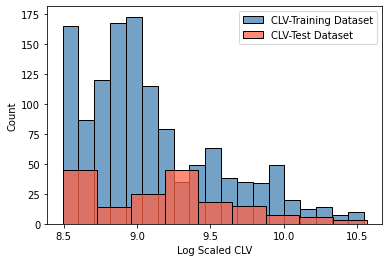

In [42]:
#Filtering Unemployed
fig, ax = plt.subplots()
df_train = datab[datab["EmploymentStatus"] == "Unemployed"]
df_test = dataTest[dataTest["EmploymentStatus"] == "Unemployed"]

for a,c in [(np.log(df_train["CLV"].astype(float)),"steelblue"), (np.log(df_test["CLV"].astype(float)),"tomato")]:
    sns.histplot(a, ax=ax, kde=False, color=c)
plt.legend(["CLV-Training Dataset","CLV-Test Dataset"])
plt.xlabel("Log Scaled CLV")
plt.show()

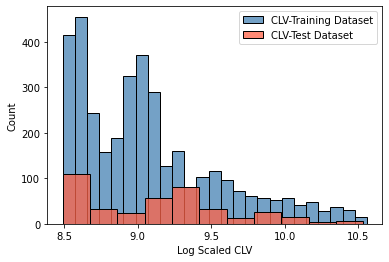

In [43]:
#Filtering Employed
fig, ax = plt.subplots()
df_train = datab[datab["EmploymentStatus"] == "Employed"]
df_test = dataTest[dataTest["EmploymentStatus"] == "Employed"]

for a,c in [(np.log(df_train["CLV"].astype(float)),"steelblue"), (np.log(df_test["CLV"].astype(float)),"tomato")]:
    sns.histplot(a, ax=ax, kde=False, color=c)
plt.legend(["CLV-Training Dataset","CLV-Test Dataset"])
plt.xlabel("Log Scaled CLV")
plt.show()

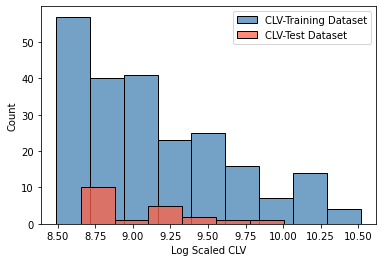

In [44]:
#Filtering Medical Leave
fig, ax = plt.subplots()
df_train = datab[datab["EmploymentStatus"] == "Medical Leave"]
df_test = dataTest[dataTest["EmploymentStatus"] == "Medical Leave"]

for a,c in [(np.log(df_train["CLV"].astype(float)),"steelblue"), (np.log(df_test["CLV"].astype(float)),"tomato")]:
    sns.histplot(a, ax=ax, kde=False, color=c)
plt.legend(["CLV-Training Dataset","CLV-Test Dataset"])
plt.xlabel("Log Scaled CLV")
plt.show()

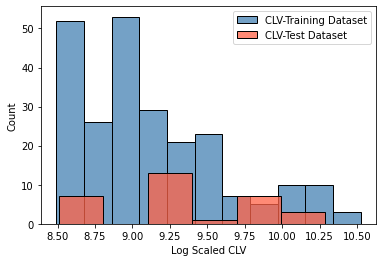

In [45]:
#Filtering Disabled
fig, ax = plt.subplots()
df_train = datab[datab["EmploymentStatus"] == "Disabled"]
df_test = dataTest[dataTest["EmploymentStatus"] == "Disabled"]

for a,c in [(np.log(df_train["CLV"].astype(float)),"steelblue"), (np.log(df_test["CLV"].astype(float)),"tomato")]:
    sns.histplot(a, ax=ax, kde=False, color=c)
plt.legend(["CLV-Training Dataset","CLV-Test Dataset"])
plt.xlabel("Log Scaled CLV")
plt.show()

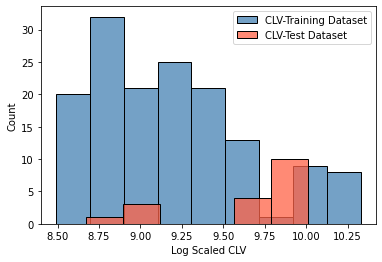

In [46]:
#Filtering Retired
fig, ax = plt.subplots()
df_train = datab[datab["EmploymentStatus"] == "Retired"]
df_test = dataTest[dataTest["EmploymentStatus"] == "Retired"]

for a,c in [(np.log(df_train["CLV"].astype(float)),"steelblue"), (np.log(df_test["CLV"].astype(float)),"tomato")]:
    sns.histplot(a, ax=ax, kde=False, color=c)
plt.legend(["CLV-Training Dataset","CLV-Test Dataset"])
plt.xlabel("Log Scaled CLV")
plt.show()

# 4.5 Conclusion

We can see that the model fit well to the training dataset, however it struggled a bit with features with small amount of data.
<br>This may be an improving point on the model we have used.

A more in depth analysis of the features could have been done to improve the results interpretation but was aborted due to a lack of time with the assignment deadline.

Although we have discovered what could be considered as a flaw in our model, it is the proof of an efficient model since it is good at generalizing predictions, **avoiding overfitting**.

<br>**Our model is a good compromise between bias and variance, which makes it a pretty good model to predict the `CLV` of future customers.**

*and voilà.*
<br>🦊